# layout-model-training

In [1]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 / 60 / 60 "h)"}'

0.0145902days (0.350164h)


## setting

### Google Drive setting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# git clone

In [3]:
#%cd /content/drive/MyDrive

In [4]:
#!git clone https://github.com/HamaruKi0303/CANE.git

In [5]:
#%cd /content/drive/MyDrive/CANE

### init

#### フォルダ移動

In [6]:
#%cd /content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/layout-model-training-master/layout-model-training-master
%cd /content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE
#%cd /content/drive/MyDrive/CANE
#%cd CANE

/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE


#### 権限変更

In [7]:
!chmod 777 scripts/train_test_split2.sh
!chmod 777 scripts/train_prima2net.sh
!chmod 777 scripts/train_prima2convert.sh

#### パスの追加

In [8]:
import sys
import pprint
import os

#sys.path.append('..')
#sys.path.append('/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/layout-model-training-master/layout-model-training-master')
sys.path.append('utils')

In [9]:
pprint.pprint(sys.path)

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 'utils']


#### その他 情報の表示

In [10]:
!pwd

/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE


In [11]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [12]:
!nvidia-smi

Sat Jul 16 05:26:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
!python -c 'import torch; print(torch.__version__) '

1.12.0+cu113


In [14]:
!ls -d /usr/local/cuda-*
!which nvcc

/usr/local/cuda-10.0  /usr/local/cuda-11    /usr/local/cuda-11.1
/usr/local/cuda-10.1  /usr/local/cuda-11.0
/usr/local/cuda/bin/nvcc


## install 

### detectron2

In [15]:
!pip install opencv-python
!pip install --upgrade pip
#!pip install layoutparser
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-t_5i2id7/detectron2_0cfdbfe0e7d94232836e29072d1b296c
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-t_5i2id7/detectron2_0cfdbfe0e7d94232836e29072d1b296c
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578
  Resolved https://github.com/facebookresearch/detectron2.git to commit 82a57ce0b70057685962b352535147d9a8118578
  Preparing metadata (setup.py) ... done


In [16]:
!pip install -r requirements_cocotools.txt
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install hydra-core --upgrade
#!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-0w1cor0b
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-0w1cor0b
  Resolved https://github.com/facebookresearch/fvcore.git to commit 15171b62a2ee8e84546af8865f32264739234899
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# datasts

In [17]:
!pip install pdf2image
!apt-get install poppler-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [18]:
import pdf2image
import tempfile
import urllib.request
import pandas as pd
import zipfile

opener = urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)

def download_auxiliary_paper_images(target_path: str = "downloaded-annotations"):

    data_to_download = pd.DataFrame(
        [
            #["1810.04805v2", 10, "1810.04805v2-10_ea8f.jpg"],
            #["1810.04805v2", 11, "1810.04805v2-11_213f.jpg"],
            #["1810.04805v2", 9, "1810.04805v2-9_dc05.jpg"],
            #["1908.03557v1", 10, "1908.03557v1-10_fa12.jpg"],
            ["1908.03557v1", 11, "1908.03557v1-11_a737.jpg"],
        ],
        columns=["arxiv_id", "page", "filename"],
    )

    for arxiv_id, gp in data_to_download.groupby("arxiv_id"):
        with tempfile.TemporaryDirectory() as tempdir:
            arxiv_link = f"http://arxiv.org/pdf/{arxiv_id}.pdf"
            urllib.request.urlretrieve(arxiv_link, f"{tempdir}/{arxiv_id}.pdf")
            pdf_images = pdf2image.convert_from_path(
                f"{tempdir}/{arxiv_id}.pdf", dpi=72
            )
            for _, row in gp.iterrows():
                pdf_images[row["page"]].save(f"{target_path}/images/{row['filename']}")


ANNOTATION_FILE_PATH = "http://szj.io/assets/files/data/layoutparser-webinar-annotations-2022-Feb.zip"

def download_zipped_annotations(): 
    filehandle, _ = urllib.request.urlretrieve(ANNOTATION_FILE_PATH)
    zip_ref = zipfile.ZipFile(filehandle, 'r')
    zip_ref.extractall("./") # extract file to dir
    zip_ref.close() # close file

In [19]:
#download_zipped_annotations()
#download_auxiliary_paper_images()

In [20]:
!ls

act.bat				      modeling
configs				      output
datasets			      README.md
downloaded-annotations_mini	      requirements_cocotools.txt
dtt2				      requirements.txt
engine				      scripts
labal_studio_data		      TensorboradViewer.ipynb
layout-model-training-Jupyter3.ipynb  tools
layout_model_training_Jupyter5.ipynb  utils


## datasets 可視化

In [21]:
from pycocotools.coco import COCO
import layoutparser as lp
import random
import cv2

def load_coco_annotations(annotations, coco=None):
    """
    Args:
        annotations (List):
            a list of coco annotaions for the current image
        coco (`optional`, defaults to `False`):
            COCO annotation object instance. If set, this function will
            convert the loaded annotation category ids to category names
            set in COCO.categories
    """
    layout = lp.Layout()

    for ele in annotations:

        x, y, w, h = ele['bbox']

        layout.append(
            lp.TextBlock(
                block = lp.Rectangle(x, y, w+x, h+y),
                type  = ele['category_id'] if coco is None else coco.cats[ele['category_id']]['name'],
                id = ele['id']
            )
        )

    return layout

In [22]:
#COCO_ANNO_PATH = 'downloaded-annotations/result.json'
COCO_ANNO_PATH = 'downloaded-annotations_mini/train2.json'
COCO_IMG_PATH  = 'downloaded-annotations_mini/'

coco = COCO(COCO_ANNO_PATH)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


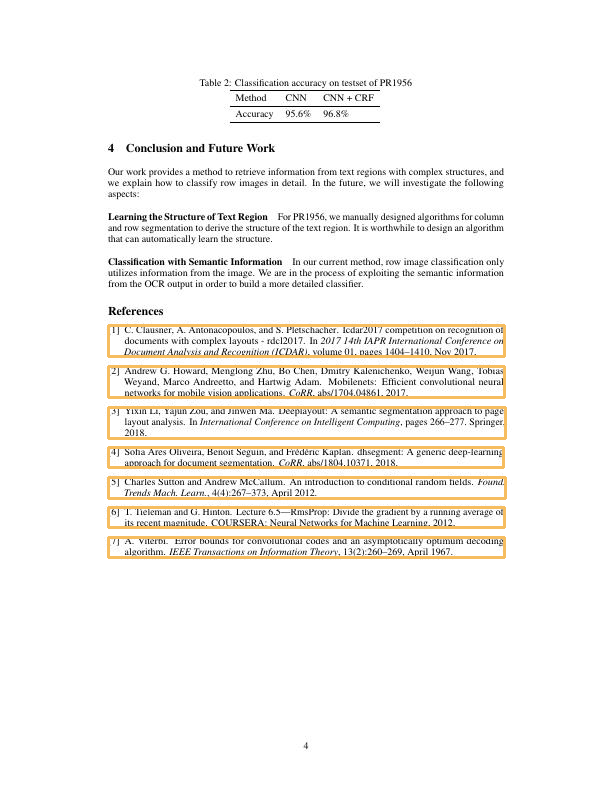

In [23]:
#for image_id in random.sample(coco.imgs.keys(), 2):

image_id = 1

image_info = coco.imgs[image_id]
annotations = coco.loadAnns(coco.getAnnIds([image_id]))

image = cv2.imread(f'{COCO_IMG_PATH}/{image_info["file_name"]}')
layout = load_coco_annotations(annotations, coco)

viz = lp.draw_box(image[...,::-1], layout)
display(viz) # show the results

In [24]:
image_info["file_name"]

'images/information_extraction_from_te-3_6774.jpg'

## サンプル datasetsの生成


In [25]:
!python utils/cocosplit.py \
    --annotation-path     downloaded-annotations/result2.json \
    --split-ratio         0.8 \
    --train               downloaded-annotations/train2.json \
    --test                downloaded-annotations/test2.json

Traceback (most recent call last):
  File "utils/cocosplit.py", line 111, in <module>
    random_state=24,
  File "utils/cocosplit.py", line 55, in main
    with open(annotation_path, "rt", encoding="UTF-8") as annotations:
FileNotFoundError: [Errno 2] No such file or directory: 'downloaded-annotations/result2.json'


## 前処理

### Configの表示

In [26]:
!cat configs/prima/fast_rcnn_R_50_FPN_3x.yaml

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST: []
  TRAIN: []
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum


### データセットの変更

In [27]:
#!scripts/train_prima2convert.sh
"""
!python tools/convert_prima_to_coco.py \
    --prima_datapath datasets/PRImADataset2 \
    --anno_savepath datasets/PRImADataset2/annotations.json
"""

'\n!python tools/convert_prima_to_coco.py     --prima_datapath datasets/PRImADataset2     --anno_savepath datasets/PRImADataset2/annotations.json\n'

## 学習開始

In [ ]:
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 / 60 / 60 "h)"}'

In [ ]:
#!scripts/train_prima2net.sh
"""
!python tools/train_net2.py \
    --dataset_name          prima-layout \
    --json_annotation_train datasets/PRImADataset2/annotations-train.json \
    --image_path_train      datasets/PRImADataset2/Images \
    --json_annotation_val   datasets/PRImADataset2/annotations-val.json \
    --image_path_val        datasets/PRImADataset2/Images \
    --config-file           configs/prima/mask_rcnn_R_50_FPN_3x.yaml \
    OUTPUT_DIR  output/PRImA/mask_rcnn_R_50_FPN_3x/001 \
    SOLVER.IMS_PER_BATCH 2 

"""
"""
!python tools/train_net2.py \
    --dataset_name          prima-layout \
    --json_annotation_train downloaded-annotations_mini/train2.json \
    --image_path_train      downloaded-annotations_mini \
    --json_annotation_val   downloaded-annotations_mini/train2.json \
    --image_path_val        downloaded-annotations_mini \
    --config-file           configs/prima/fast_rcnn_R_50_FPN_3x.yaml \
    --resume \
    OUTPUT_DIR  output/PRImA/fast_rcnn_R_50_FPN_3x/017 \
    SOLVER.IMS_PER_BATCH 12 \
    SOLVER.CHECKPOINT_PERIOD 50 \
    SOLVER.BASE_LR 0.0001 \
    MODEL.WEIGHTS /content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/017/model_0001999.pth \
"""

!python tools/train_net2.py \
    --dataset_name          prima-layout \
    --json_annotation_train CANE_datasets/train2.json \
    --image_path_train      CANE_datasets \
    --json_annotation_val   CANE_datasets/train2.json \
    --image_path_val        CANE_datasets \
    --config-file           configs/prima/fast_rcnn_R_50_FPN_3x.yaml \
    OUTPUT_DIR  output/PRImA/fast_rcnn_R_50_FPN_3x/020 \
    SOLVER.IMS_PER_BATCH 12 \
    SOLVER.CHECKPOINT_PERIOD 1000 \
    SOLVER.BASE_LR 0.0001











>>>>>>> train_net >>>>>>
['/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE/tools',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 'tools/..',
 'tools/.']
Command Line Args: Namespace(config_file='configs/prima/fast_rcnn_R_50_FPN_3x.yaml', dataset_name='prima-layout', dist_url='tcp://127.0.0.1:49152', eval_only=False, image_path_train='CANE_datasets', image_path_val='CANE_datasets', json_annotation_train='CANE_datasets/train2.json', json_annotation_val='CANE_datasets/train2.json', machine_rank=0, model_path=None, num_gpus=1, num_machines=1, opts=['OUTPUT_DIR', 'output/PRImA/fast_rcnn_R_50_FPN_3x/020', 'SOLVER.IMS_PER_BATCH', '12', 'SOLVER.CHECKPOINT_PERIOD', '1000', 'SOLVER.BASE_LR', '0.0001'], resume=False)
[07/16 07:45:25 detectron2]: Rank of current process: 0. World size: 1
[07/16 07:45:26 detectron2]: Environment info:
-----------

# inference

In [52]:

!python tools/train_net2.py \
    --dataset_name          prima-layout \
    --json_annotation_train downloaded-annotations_mini/train2.json \
    --image_path_train      downloaded-annotations_mini \
    --json_annotation_val   downloaded-annotations_mini/train2.json \
    --image_path_val        downloaded-annotations_mini \
    --config-file           configs/prima/fast_rcnn_R_50_FPN_3x.yaml \
    --resume \
    --eval-only \
    OUTPUT_DIR  output/PRImA/fast_rcnn_R_50_FPN_3x/017 \
    SOLVER.IMS_PER_BATCH 12 \
    MODEL.WEIGHTS /content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/017/model_0003999.pth \
    SOLVER.BASE_LR 0.0001 \

>>>>>>> train_net >>>>>>
['/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE/tools',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 'tools/..',
 'tools/.']
Command Line Args: Namespace(config_file='configs/prima/fast_rcnn_R_50_FPN_3x.yaml', dataset_name='prima-layout', dist_url='tcp://127.0.0.1:49152', eval_only=True, image_path_train='downloaded-annotations_mini', image_path_val='downloaded-annotations_mini', json_annotation_train='downloaded-annotations_mini/train2.json', json_annotation_val='downloaded-annotations_mini/train2.json', machine_rank=0, model_path=None, num_gpus=1, num_machines=1, opts=['OUTPUT_DIR', 'output/PRImA/fast_rcnn_R_50_FPN_3x/017', 'SOLVER.IMS_PER_BATCH', '12', 'MODEL.WEIGHTS', '/content/drive/MyDrive/PROJECT/201_HaMaruki/201_32_Layout_parser/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/017/model_0003999.pth', 'SOLVE

In [30]:
df_eval = pd.read_csv('/content/drive/MyDrive/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/015/eval.csv')

FileNotFoundError: ignored

In [ ]:
df_eval

# Predict

In [ ]:
from engine import DefaultPredictor
from detectron2.config import get_cfg

# create config
cfg = get_cfg()

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/015/model_0001999.pth"
cfg.MODEL.DEVICE = "cuda" # we use a CPU Detectron copy
cfg.MODEL.ROI_HEADS.NUM_CLASSES =1 #num_of_classes   
predictor = DefaultPredictor(cfg)
print("Predictor has been initialized.")


## read image

In [ ]:
import numpy as np
#image = cv2.imread("data/paper-image.jpg")
image = cv2.imread("downloaded-annotations_mini/images/information_extraction_from_te-3_6774.jpg")
#image = cv2.imread("/content/drive/MyDrive/CANE/output/data_img_6573.861215252.png")


image = image[..., ::-1] 
print("image.shape:{}".format(image.shape))
print("image.shape:{}".format(np.max(image)))
print("image.shape:{}".format(np.min(image)))
# Convert the image from BGR (cv2 default loading style)
# to RGB

In [ ]:
pred_result = predictor(image)
pred_result

## Use Layout Models to detect complex layout 

In [ ]:
import layoutparser as lp

model = lp.Detectron2LayoutModel(
    config_path = "configs/prima/fast_rcnn_R_50_FPN_3x.yaml",
    model_path = "/content/drive/MyDrive/CANE/output/PRImA/fast_rcnn_R_50_FPN_3x/015/model_0001999.pth",
    #model_path = "output/PRImA/fast_rcnn_R_50_FPN_3x/004/model_0003999.pth",
    extra_config = ["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.5] # <-- Only output high accuracy preds
)

In [ ]:
layout = model.detect(image)

In [ ]:
layout

In [ ]:
#lp.draw_box(image, layout)
lp.draw_box(image,
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in layout],
              show_element_id=True, id_font_size=10,
              id_text_background_color='black',
              id_text_color='white')